In [1]:
import pandas as pd
import numpy as np

In [2]:
airpas = pd.read_csv(r"AirPassengers.csv")

In [3]:
airpas

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# PS is to forecast the passengers for next 12 months (for year 1961)
# Random Sampppling is crime 
#Breaking the series is also crime.

In [5]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format = True)

C:\Users\om\AppData\Local\Temp\ipykernel_2260\894506578.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format = True)


In [7]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
airpas = airpas.set_index(['Month'])

In [9]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
# We will check if our series is stationary or not

In [11]:
import matplotlib.pyplot as plt

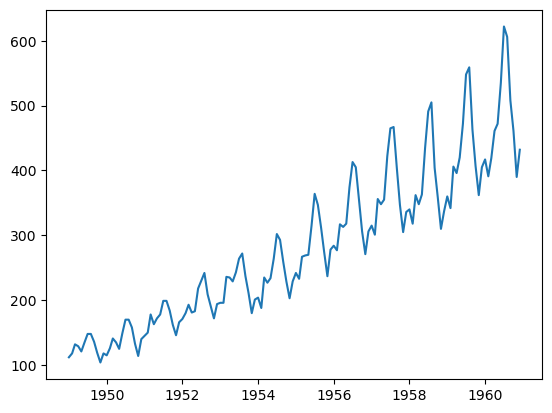

In [12]:
plt.plot(airpas)

In [13]:
# the series which we got is not stationary anmd we have to make it stationary.

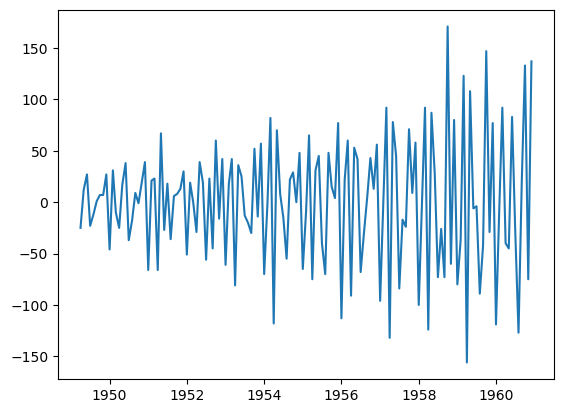

In [14]:
plt.plot(airpas.diff().diff().diff())

In [15]:
# Even after multiple level of differencing sereies does not became Stationary.
# We are going to take the log of the series

In [16]:
airpas_log = np.log(airpas)

In [17]:
airpas_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


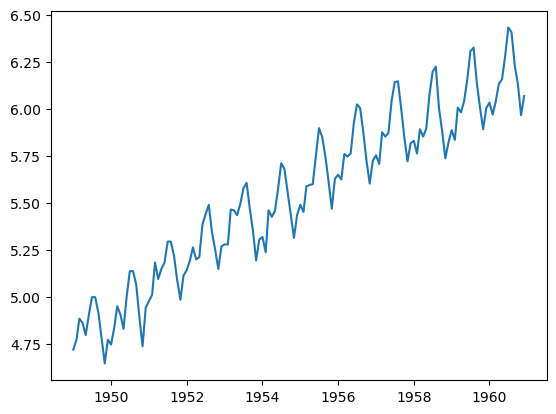

In [18]:
plt.plot(airpas_log)

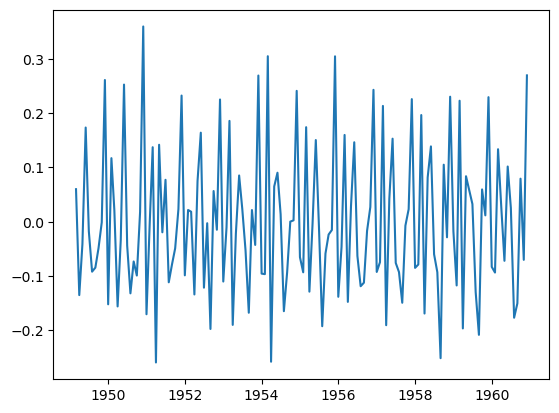

In [19]:
plt.plot(airpas_log.diff().diff())

In [20]:
# After taking log and applying differencing we get the series Stationary.
# If you are using the Log you model varience andf mean will be constant.
# for building a model we nee 3 thing are p,d,q and we know ( p=? , d=1 , q=? )

In [21]:
# To find the p and q we need to use ACF and PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

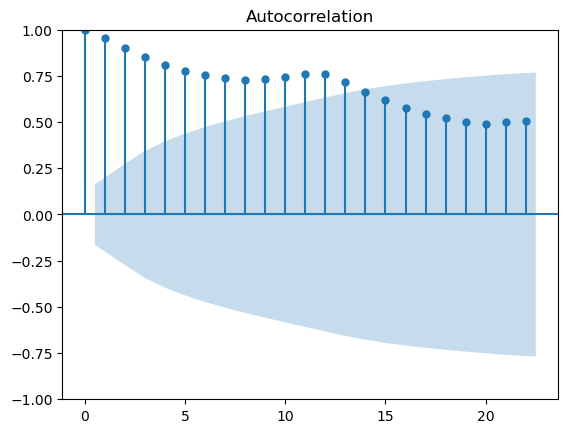

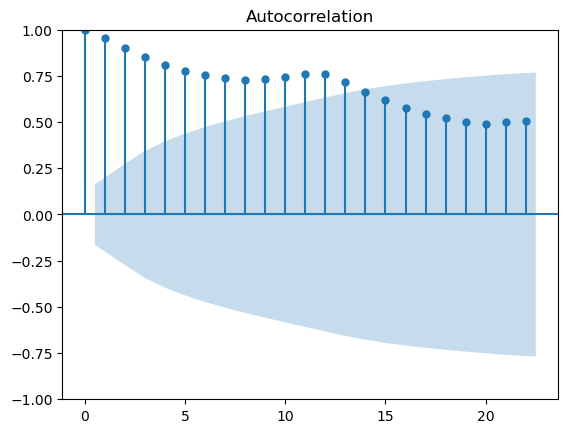

In [23]:
plot_acf(airpas_log)

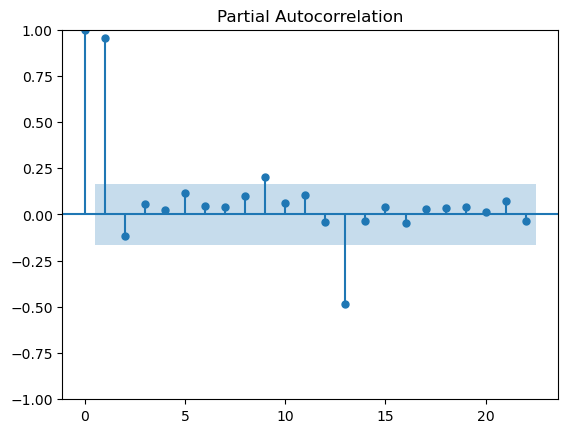

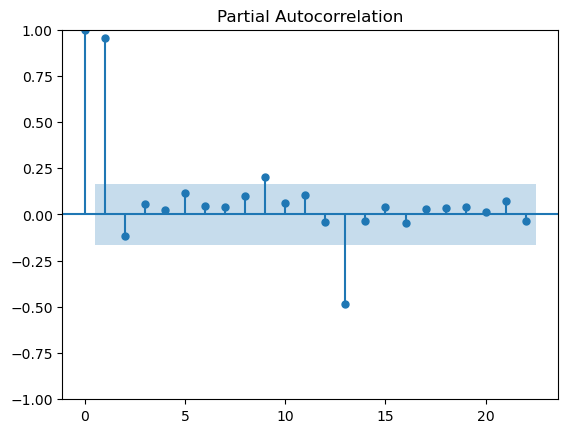

In [24]:
plot_pacf(airpas_log)

In [25]:
# ARIMA 

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# model = ARIMA(airpas_log.Passengers , order = (2,1,0))

In [28]:
# How to use the SARIMA and SARIMAX?

# WE will use auto_arima and whatever values we will get from auto arima we are going to pass it into our model 

In [29]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [30]:
result = seasonal_decompose(airpas_log)

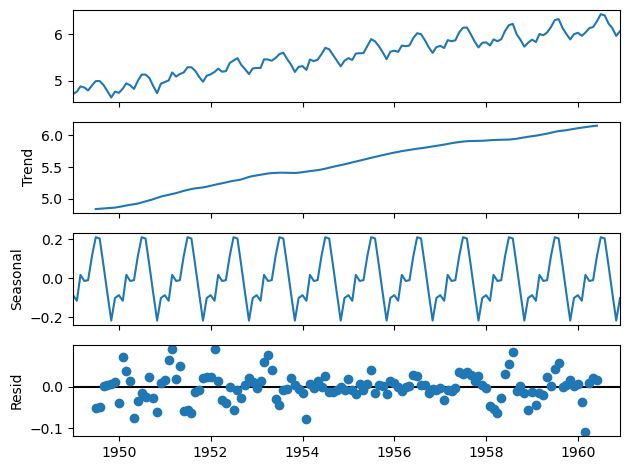

In [31]:
result.plot();
# this plot is to just get the idea about data.

In [64]:
auto_arima(airpas_log , seasonal=True , m=12)

# m  is time period 

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [66]:
# Whatever Values  will get from auto_arima we will passss them in SARIMAX

In [70]:
model_sarima = SARIMAX(airpas_log , order=(2,0,0) , seasonal_order =(0,1,1,12))

C:\Users\om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
airpas_model = model_sarima.fit()

In [76]:
pred_values = airpas_model.predict(start =144 , end=155)
pred_values

1961-01-01    6.103840
1961-02-01    6.045890
1961-03-01    6.162775
1961-04-01    6.188957
1961-05-01    6.220978
1961-06-01    6.356003
1961-07-01    6.493253
1961-08-01    6.487675
1961-09-01    6.308305
1961-10-01    6.191378
1961-11-01    6.044703
1961-12-01    6.148074
Freq: MS, Name: predicted_mean, dtype: float64

In [78]:
prd_values1 = np.exp(pred_values)
prd_values1

1961-01-01    447.573250
1961-02-01    422.373664
1961-03-01    474.743676
1961-04-01    487.337767
1961-05-01    503.195312
1961-06-01    575.939632
1961-07-01    660.669179
1961-08-01    656.994187
1961-09-01    549.113433
1961-10-01    488.519062
1961-11-01    421.872365
1961-12-01    467.815338
Freq: MS, Name: predicted_mean, dtype: float64

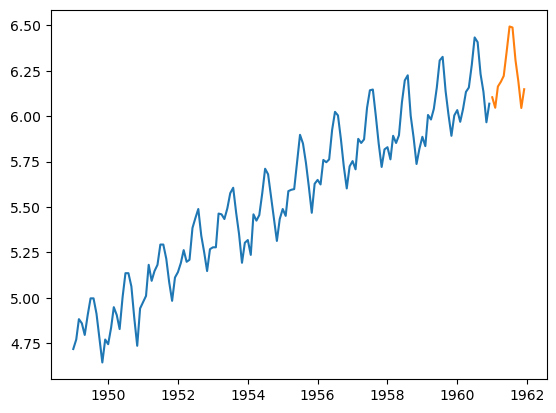

In [96]:
plt.plot(airpas_log)
plt.plot(pred_values)

In [98]:
df = pd.DataFrame()
df['Predicted'] = prd_values1
date_for_pred = ['1961-01-01', '1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01',
                 '1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']
df['Month'] = date_for_pred

df.Month = pd.to_datetime(df.Month , infer_datetime_format = True)
df = df.set_index(['Month'])

C:\Users\om\AppData\Local\Temp\ipykernel_2260\4118481304.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.Month = pd.to_datetime(df.Month , infer_datetime_format = True)


In [100]:
df

,Predicted
Month,
1961-01-01,447.573250
1961-02-01,422.373664
1961-03-01,474.743676
1961-04-01,487.337767
1961-05-01,503.195312
1961-06-01,575.939632
1961-07-01,660.669179
1961-08-01,656.994187
1961-09-01,549.113433


<Axes: xlabel='Month'>

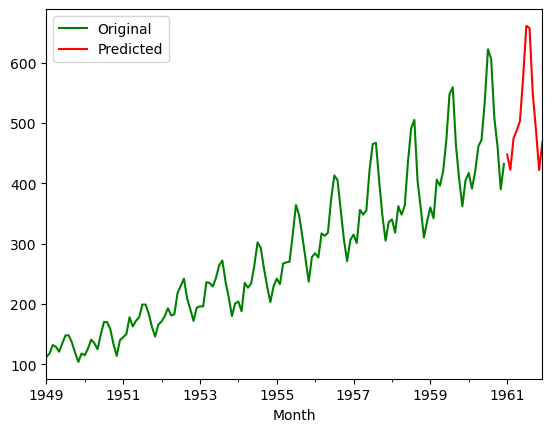

In [102]:
airpas['Passengers'].plot(legend=True , label='Original', color='green')
df['Predicted'].plot(legend=True, label='Predicted' , color='red')